<img src="Images/Ballenas_logo.jpg">
# BSS Cube Satellite Payload: Environmental Data
This notebook displays data collected from one of the Raspberry Pi 3 Model B's. This pi will be running the computational program and collecting environmental data from the pihat.  

In [1]:
#import of libraries.
#this cell must be ran each time the notebook is started.
import pandas as pd
import numpy as np
from IPython.display import set_matplotlib_formats
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

## Static Test
This static test will be compared to the data we collect during the rocket flight. 
#### Description of Computational Program
To meet the desires of the science team, software devised a new computational program that would calculate a set equation while printing the time it took to calculate each time. The equation used is 'x^2' where x increases by 1 each time. The data will write to a single file, then after five minutes, it will begin writing to a new file. 

In [2]:
# these next fews cells imports the following datafiles from the computational program
data0 = pd.read_csv('Datafiles/CompStatic/calcresults0.txt')
#data0.info()
data1 = pd.read_csv('Datafiles/CompStatic/calcresults1.txt')
#data3.info()
data2 = pd.read_csv('Datafiles/CompStatic/calcresults2.txt')
#data2.info()

In [3]:
datastatic = pd.concat([data0, data1, data2]) # this will combine the three datafiles into one
datastatic.info()

iterationstatic = datastatic['iteration'] # assign data to a variable to be called up later
timestatic = datastatic['time']
resultstatic = datastatic['result']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3158320 entries, 0 to 1052084
Data columns (total 3 columns):
iteration    int64
time         float64
result       int64
dtypes: float64(1), int64(2)
memory usage: 96.4 MB


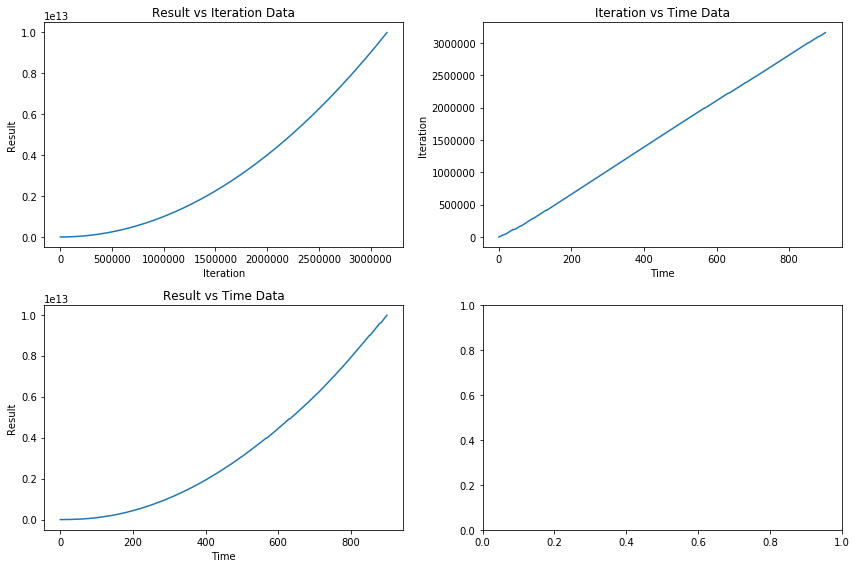

In [4]:
#this cell plots the data as the result as a function of the iteration
fig, ((plot1, plot2), (plot3, plot4))=plt.subplots(2,2, figsize=(12, 8))
plot1.set_xlabel('Iteration')
plot1.set_ylabel('Result')
plot1.set_title('Result vs Iteration Data')
plot1.plot(iterationstatic, resultstatic)

plot2.set_xlabel('Time')
plot2.set_ylabel('Iteration')
plot2.set_title('Iteration vs Time Data')
plot2.plot(timestatic, iterationstatic)   

plot3.set_xlabel('Time')
plot3.set_ylabel('Result')
plot3.set_title('Result vs Time Data')
plot3.plot(timestatic, resultstatic)
      
fig.tight_layout()
plt.show()

In [5]:
# will determine if the program properly calculated the equation by finding the last result and last iteration in the datafile
# and squaring the iteration to see if it equals the result
maxRs = max(resultstatic)
maxIs = max(iterationstatic)
maxTs = max(timestatic)
if max(resultstatic) == (max(iterationstatic)**2):
    print('Correct')
else:
    print('Program didnt properly calculate the equation')

Correct


In [6]:
# finding the time it took the program to write the amount of iterations
maxmins = maxTs/60
print('It took',maxTs,'seconds or',maxmins,'minutes to calculate', maxIs,'iterations.')

It took 900.000711441 seconds or 15.0000118574 minutes to calculate 3158319 iterations.


In [7]:
# check to see if any iterations were skipped 
# create program that will find the time it took to write each calculation
# find min and max time it took to write each result to determine if there is a large discrepancy in the data

## Computational Program Analysis From Satellite
The cells below will upload the files and analyze the data collected while also comparing it to the static test.

In [8]:
# these next fews cells imports the following datafiles from the computational program


data0 = pd.read_csv('Datafiles/Relay/calcresults0.txt')
#data0.info()

data1 = pd.read_csv('Datafiles/Relay/calcresults1.txt')
#data1.info()

data2 = pd.read_csv('Datafiles/Relay/calcresults2.txt')
#data3.info()

data3 = pd.read_csv('Datafiles/Relay/calcresults3.txt')
#data3.info()

data4 = pd.read_csv('Datafiles/Relay/calcresults4.txt')
#data4.info()

data5 = pd.read_csv('Datafiles/Relay/calcresults5.txt')
#data5.info()

data6 = pd.read_csv('Datafiles/Relay/calcresults6.txt')
#data6.info()

data7 = pd.read_csv('Datafiles/Relay/calcresults7.txt')
#data7.info()

In [9]:
# this will combine all the datafiles into one
dataC = pd.concat([data0, data1, data2, data3, data4, data5, data6, data7]) 
dataC.info()
iterationC = dataC['iteration'] # assign data to a variable to be called up later
timeC = dataC['time']
resultC = dataC['result']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7477770 entries, 0 to 889101
Data columns (total 6 columns):
192631               float64
37106702161          float64
68.28670835494995    float64
iteration            float64
result               float64
time                 float64
dtypes: float64(6)
memory usage: 399.4 MB


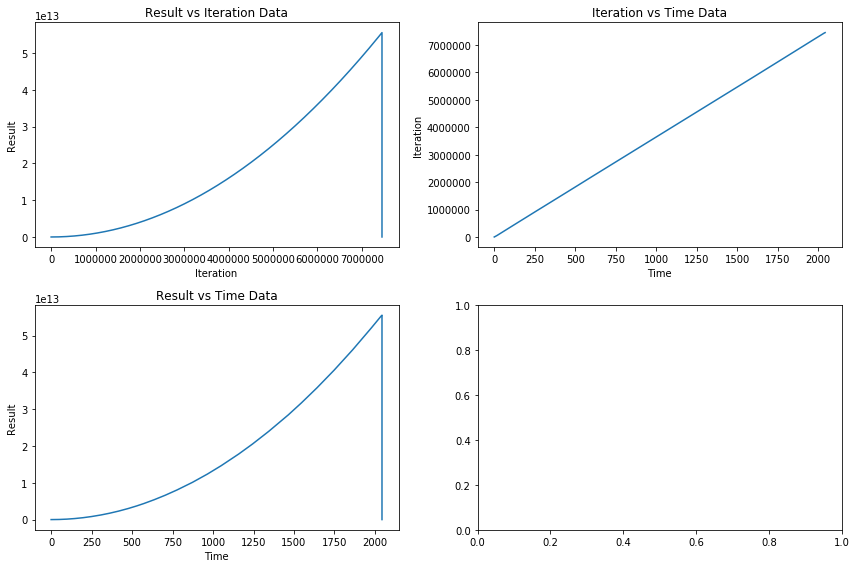

In [10]:
#this cell plots the data as the result as a function of the iteration
fig, ((plot1, plot2), (plot3, plot4))=plt.subplots(2,2, figsize=(12, 8))
plot1.set_xlabel('Iteration')
plot1.set_ylabel('Result')
plot1.set_title('Result vs Iteration Data')
plot1.plot(iterationC, resultC)

plot2.set_xlabel('Time')
plot2.set_ylabel('Iteration')
plot2.set_title('Iteration vs Time Data')
plot2.plot(timeC, iterationC)   

plot3.set_xlabel('Time')
plot3.set_ylabel('Result')
plot3.set_title('Result vs Time Data')
plot3.plot(timeC, resultC)
      
fig.tight_layout()
plt.show()

In [11]:
# will determine if the program properly calculated the equation by finding the last result and last iteration in the datafile
# and squaring the iteration to see if it equals the result
maxR = max(resultC)
maxI = max(iterationC)
maxT = max(timeC)
if max(resultC) == (max(iterationC-1)**2):
    print('Correct')
else:
    print('Program didnt properly calculate the equation')

Program didnt properly calculate the equation


In [12]:
# finding the time it took the program to write the amount of iterations
maxmin = maxT/60
print('It took',maxT,'seconds or',maxmin,'minutes to calculate', maxI,'iterations.')

It took nan seconds or nan minutes to calculate nan iterations.


In [13]:
# this cell will compare the amount of time it took to calculate the equation to the static
staticC = (maxTs/maxIs)*100000
testC = (maxT/maxI)*100000
print('The static test calculated 100,000 iterations in',staticC,'seconds while the pi from the satellite did so in', testC,'seconds.')

The static test calculated 100,000 iterations in 28.4961940653 seconds while the pi from the satellite did so in nan seconds.


## Relay Analysis

In [14]:
# loading datafile using pandas
dataR = pd.read_csv('Datafiles/Relay/RelayLog0.txt')
dataR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4088 entries, 0 to 4087
Data columns (total 2 columns):
time      4088 non-null float64
on/off    4088 non-null int64
dtypes: float64(1), int64(1)
memory usage: 64.0 KB


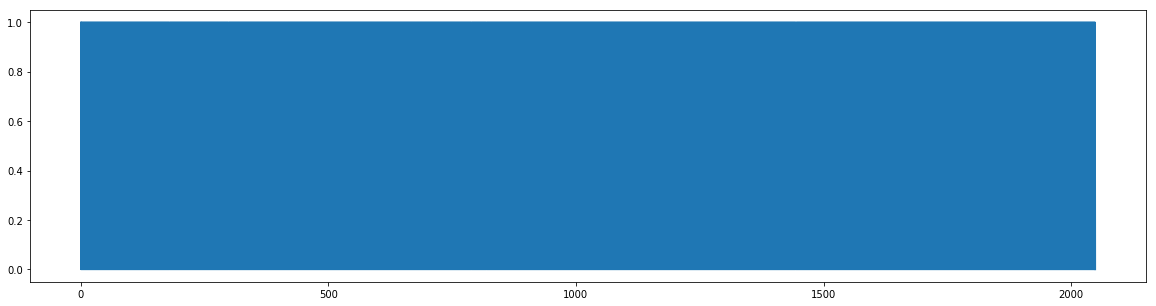

In [15]:
# assigns the data to a variable
plt.figure(figsize=(20,5))
timeR = dataR['time']
on_off = dataR['on/off']
plt.plot(timeR, on_off) # plot on_off vs time

In [16]:
# finds the time the relay program ran for
max_timeR = max(timeR) # max time in seconds
max_timeRmin = max_timeR/60 # max time in minutes
print('The relay program ran for',max_timeR,'seconds or',max_timeRmin,'minutes.')

The relay program ran for 2048.64484167 seconds or 34.1440806945 minutes.


In [17]:
# compare the time each program ran for
Rd = {'Programs': ['Comp.', 'Relay'],'Time': [maxT, max_timeR]}
Relaydf = pd.DataFrame(data=Rd)
Relaydf

,Programs,Time
0,Comp.,NaN
1,Relay,2048.644842
